# Importing Libraries 

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Cleaning

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [6]:
df.fillna({'country': 'Unknown', 'director': 'Not Specified'}, inplace=True)

In [7]:
# Standardize date format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Data Analysis

# Content Type Distribution

In [18]:
df['type'].value_counts(normalize=True) * 100

type
Movie      69.692833
TV Show    30.307167
Name: proportion, dtype: float64

# Content Growth

In [9]:
df['year_added'].value_counts().sort_index()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

# Top Producing Countries

In [19]:
df['country'].value_counts().head(5)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Name: count, dtype: int64

# Popular Genres

In [11]:
df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

# Content Duration

In [12]:
df[df['type'] == 'Movie'].sort_values(by='duration', ascending=False).head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
3565,s4930,Movie,I Am not an Easy Man,Eleonore Pourriat,France,2018-04-13,2018,TV-MA,99 min,"Comedies, International Movies, Romantic Movies",2018,April
476,s338,Movie,Good Luck Chuck,Mark Helfrich,United States,2021-08-01,2007,R,99 min,"Comedies, Romantic Movies",2021,August
1248,s1330,Movie,The Misadventures of Hedi and Cokeman,Julien Royal,France,2021-02-10,2021,TV-MA,99 min,"Comedies, International Movies",2021,February
5148,s7075,Movie,Indiscretion,John Stewart Muller,United States,2017-02-01,2016,TV-MA,99 min,"Dramas, Thrillers",2017,February
961,s930,Movie,Dead Again in Tombstone,Roel Reiné,Not Given,2021-05-01,2017,R,99 min,"Action & Adventure, Horror Movies",2021,May


# Data Visualization

# Content Type Distribution

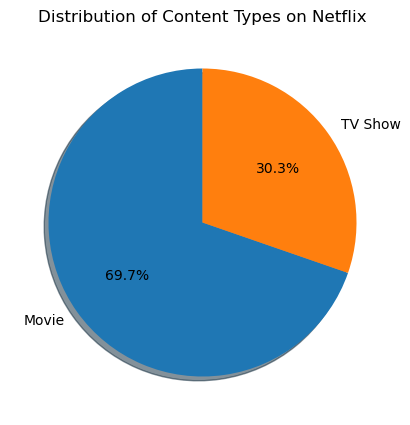

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Content Types on Netflix')
plt.ylabel('')  # Hide y-axis label
plt.show()

# Content Added by Year

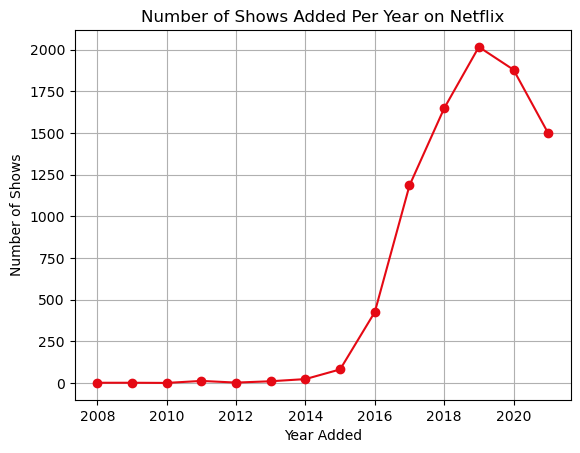

In [14]:
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime if not already
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year
df['year_added'] = df['date_added'].dt.year

# Group by year_added and plot
df.groupby('year_added').size().plot(kind='line', marker='o' , color='#E50914')

plt.title('Number of Shows Added Per Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()


# Popular Genres Word Cloud

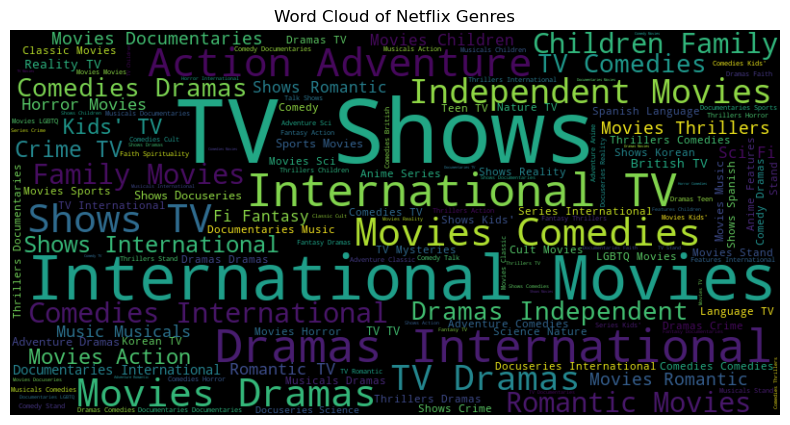

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all genres into one string
genres = ' '.join(df['listed_in'].dropna())

# Create word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(genres)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Netflix Genres')
plt.show()

# Top Producing Countries

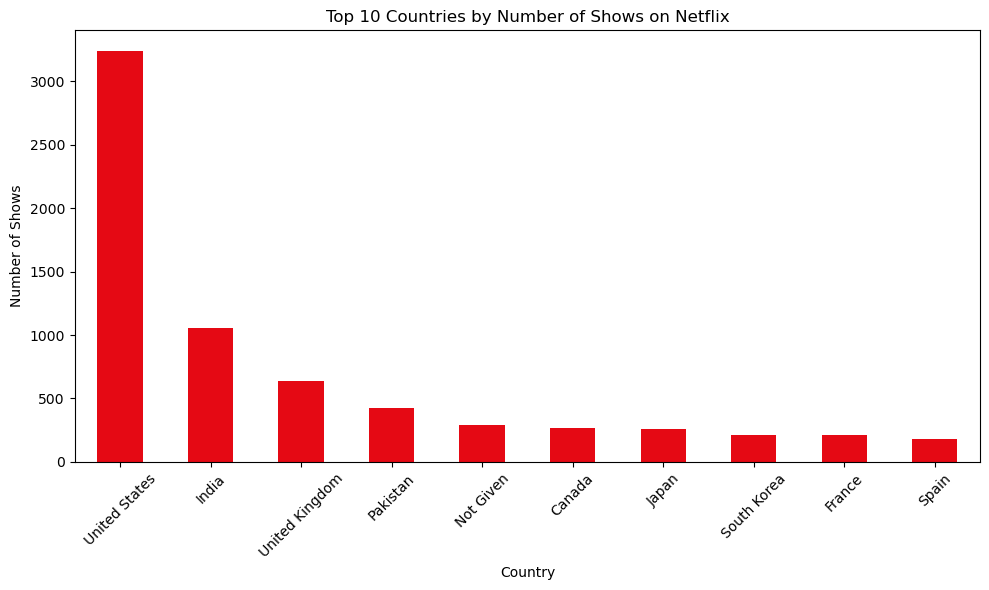

In [21]:
import matplotlib.pyplot as plt

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='#E50914')  # Netflix red
plt.title('Top 10 Countries by Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Ratings Distribution on Netflix

C:\Users\sanit\AppData\Local\Temp\ipykernel_26356\2887243830.py:16: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


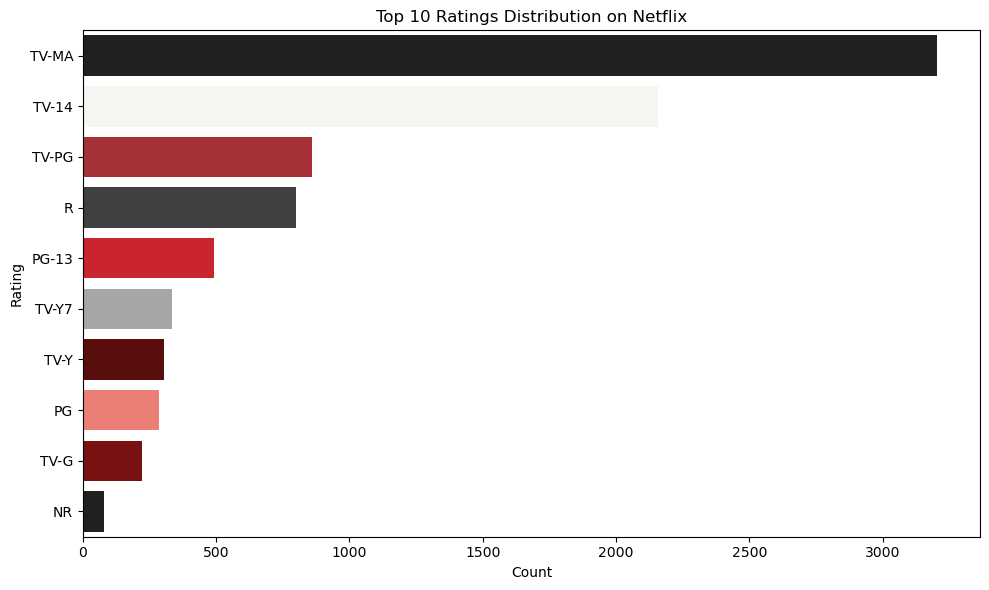

In [17]:
# Netflix-style palette (10 distinct colors)
netflix_palette = [
    '#E50914',  # Netflix Red
    '#221f1f',  # Netflix Black
    '#B81D24',  # Darker Red
    '#F5F5F1',  # Light Gray
    '#A6A6A6',  # Gray
    '#660000',  # Dark Maroon
    '#FF6F61',  # Light Netflix Red
    '#8B0000',  # Deep Red
    '#404040',  # Charcoal
    '#D32F2F'   # Strong Red
]

plt.figure(figsize=(10, 6))
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index[:10],
    hue='rating',
    palette=netflix_palette,
    legend=False
)

plt.title('Top 10 Ratings Distribution on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()